# Making an RNN model to predict Google stock price

## Importing required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading training dataset

In [7]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [8]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [9]:
training_set = dataset_train.iloc[:,1:2].values

In [10]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Applying feature scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating input dataset with 60 timesteps

In [13]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)

## Reshaping the training dataset into 3D

In [15]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Importing Keras libraries

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initializing the RNN

In [17]:
regressor = Sequential()

## Adding first LSTM layer

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding second LSTM layer

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding third LSTM layer

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding fourth LSTM layer

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## Adding the output layer

In [22]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [23]:
regressor.compile(optimizer='adam' , loss='mean_squared_error')

## Training the RNN

In [24]:
regressor.fit(X_train , y_train , epochs=100 , batch_size=32)

Epoch 1/100
38/38 [==============================] - 26s 117ms/step - loss: 0.0740
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0039
Epoch 13/100

## Reading the test dataset

In [25]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [26]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [29]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [30]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Creating the input dataset

In [31]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']) , axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [32]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Comparing the predicted price to the actual price

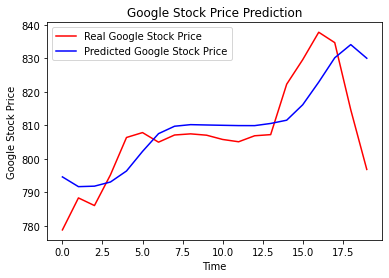

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

As is seen above, the general trend of the predicted plot is similar to that of the actual plot